dsñ-1-exp01.csv


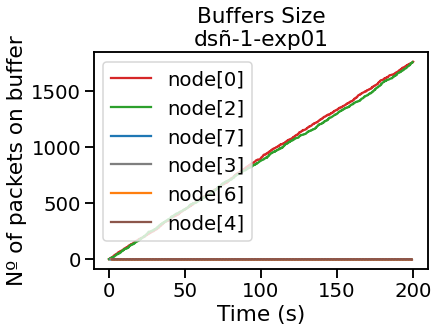

caso2-15.csv


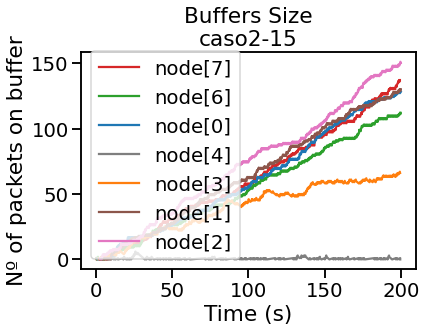

dsñ-2.csv


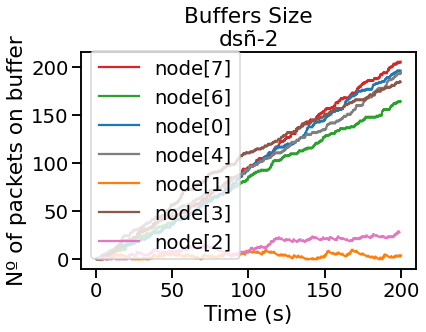

caso2.csv


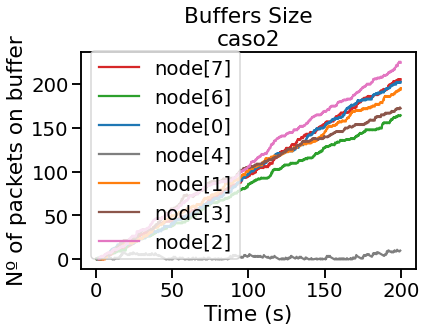

dsñ-1.csv


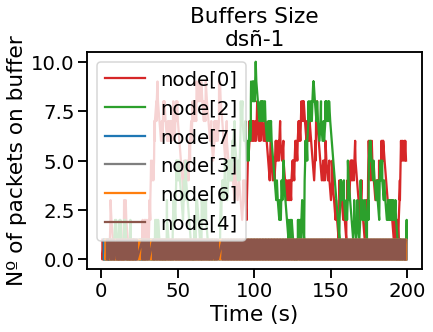

dsñ-2-exp05.csv


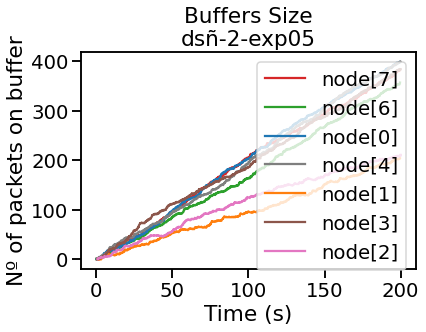

dsñ-1-exp05.csv


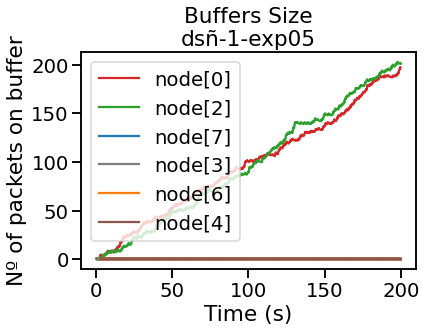

caso2-13.csv


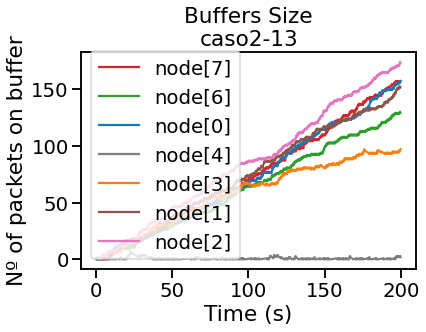

caso1.csv


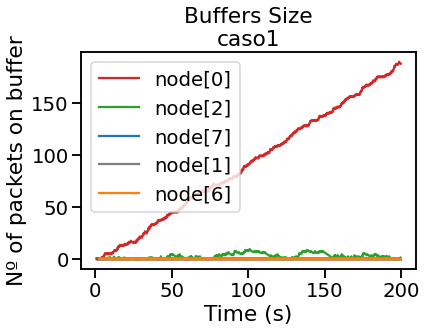

caso2-2.csv


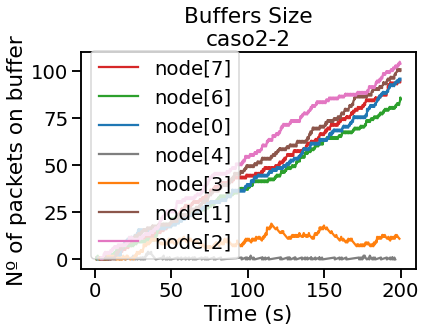

dsñ-2-exp01.csv


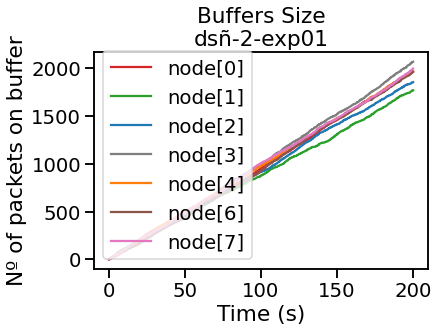

In [4]:
import matplotlib.pyplot as plt
from pandas import read_csv
from seaborn import set_context, barplot
from google.colab import files
from numpy import mean,array
from random import choice
from os import listdir

set_context(context='talk', font_scale=1.2)

DIR = 'results/'
FILES = listdir(DIR)

for file in FILES:
    if not file.__contains__('.csv'):
        continue
    FILENAME = DIR + file
    print(file)
    data = read_csv(FILENAME)

    #print(data)

    module = {}

    for i in range(0,len(data['module'])):
        if isinstance(data['module'][i],str) and data['module'][i] != 'Network.node[5].app':
            module[data['module'][i]] = i

    def get_vectime (col):
        return (data['vectime'][col]).split(' ')

    def get_vecvalue (col):
        return (data['vecvalue'][col]).split(' ')

    last_dict = {}

    def compose (namee):
        vt = get_vectime(module[namee])
        vt = list(map(float,vt))
        vv = get_vecvalue(module[namee])
        vv = list(map(float,vv))
        aux = {namee : [vt , vv]}
        last_dict.update(aux)


    for n in module.keys():
        compose(n)

    colors = ['tab:red','tab:green','tab:blue','tab:gray','tab:orange','tab:brown', 'tab:pink']

    i = 0
    for metric in last_dict.keys():
        try:
            plt.plot(last_dict[metric][0],last_dict[metric][1],
                    color=colors[i],
                    label=metric.replace('Network.','').replace('.lnk[0]','').replace('.lnk[1]',''))
        except IndexError:
            plt.plot(last_dict[metric][0],last_dict[metric][1],
                    color=choice(colors),
                    label=metric.replace('Network.','').replace('.lnk[0]','').replace('.lnk[1]',''))
        i += 1

    plt.xlabel('Time (s)')
    plt.ylabel('Nº of packets on buffer')
    plt.title('Buffers Size\n' + file.replace('.csv',''))
    plt.legend()


    plt.savefig('plots/' + file.replace('.csv','') + '-bufffersize' + '.png',
            bbox_inches ="tight",
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

    plt.show()

    